# **Student Performance**

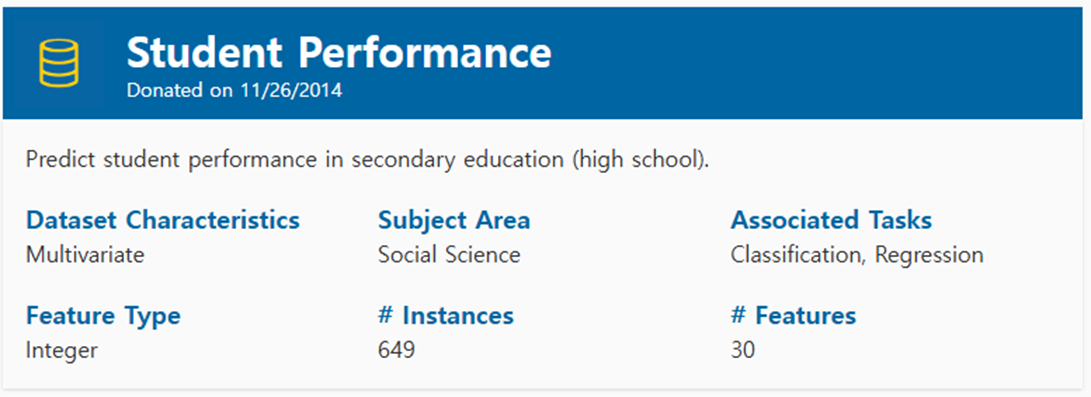

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd
import numpy as np
student_df = pd.read_csv('student-por.csv', sep=';')

In [14]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  
  
these grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

### **EDA, 전처리, Feature Engineering**

In [15]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [16]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [17]:
student_df['pass_fail'] = student_df['G3'].apply(lambda x: 1 if x >= 12 else 0)

#### 분류문제로 만들기 위해 G3 피쳐가 12점 이상인 경우를 합격으로 한다.

In [18]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


In [19]:
student_df[student_df['pass_fail'] == 1]['pass_fail'].count()

348

합격 348명, 불합격 301명

### **각 피쳐별 score 분포 확인**

#### **1. School**

In [20]:
student_df['school'].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

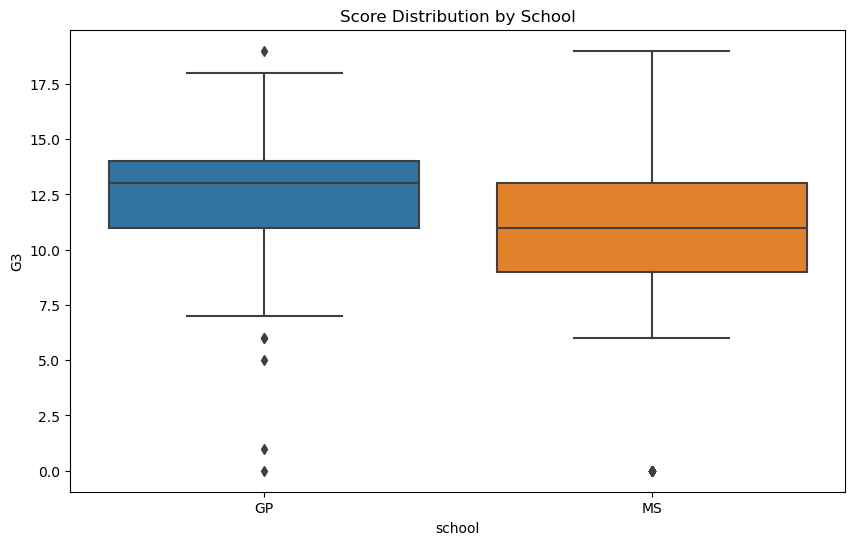

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='school', y='G3')
plt.title("Score Distribution by School")
plt.show()

**GP 학교가 평균적으로 최종점수가 높다 (School feature는 예측에 유의미하다고 볼 수 있음)**

#### **2. Sex**

In [22]:
student_df['sex'].value_counts()

sex
F    383
M    266
Name: count, dtype: int64

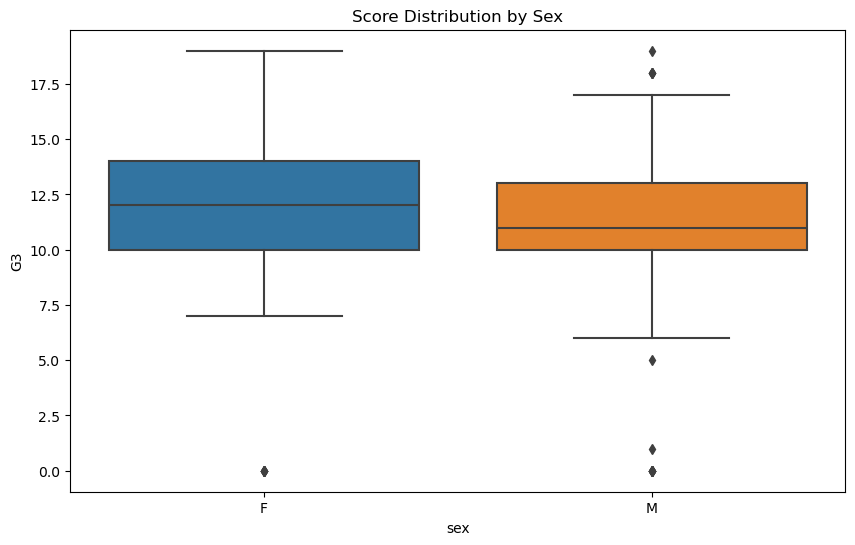

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='sex', y='G3')
plt.title("Score Distribution by Sex")
plt.show()

**성별에 따라 점수차이가 있지만 결정적인 요소라고 판단하기에는 어려워보임**

#### **3. age**

In [24]:
student_df['age'].value_counts()

age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

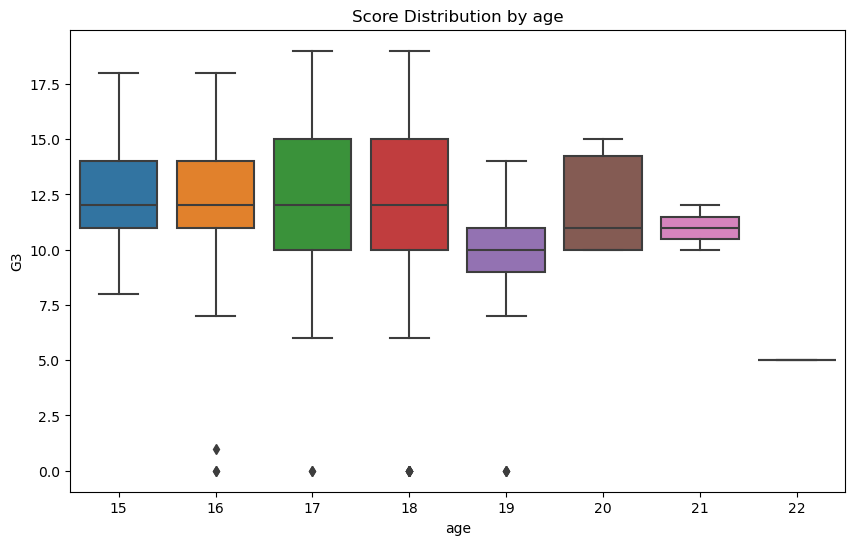

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='age', y='G3')
plt.title("Score Distribution by age")
plt.show()

**19세 이상으로는 성적이 떨어지는 경향성이 있다**

#### **4. address**

In [26]:
student_df['address'].value_counts() # U : 도시, R : 시골

address
U    452
R    197
Name: count, dtype: int64

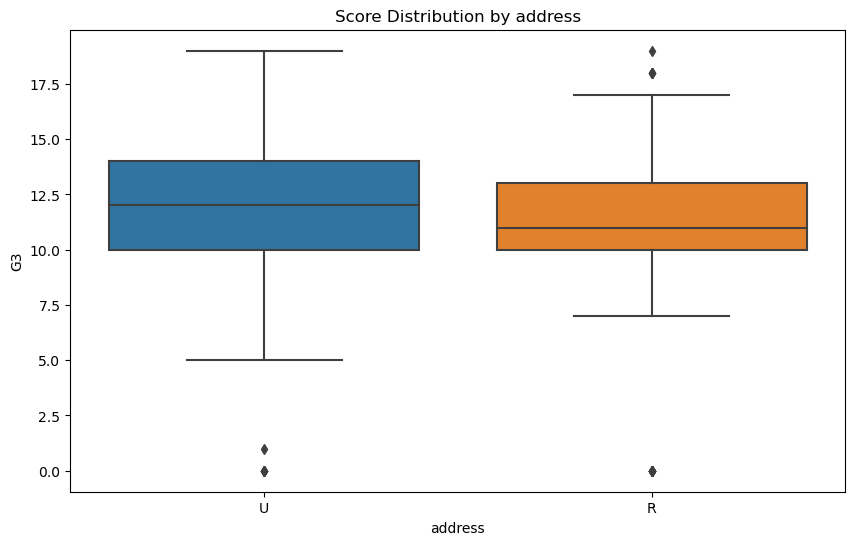

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='address', y='G3')
plt.title("Score Distribution by address")
plt.show()

**도시 거주 학생이 시골거주 학생보다 성적이 약간 높은 경향성이 있지만 결정적인 변수는 아닌것으로 보임**

#### **5. famsize**

In [28]:
student_df['famsize'].value_counts()

famsize
GT3    457
LE3    192
Name: count, dtype: int64

3보다 가족수가 많으면 GT3, 적으면 LE3

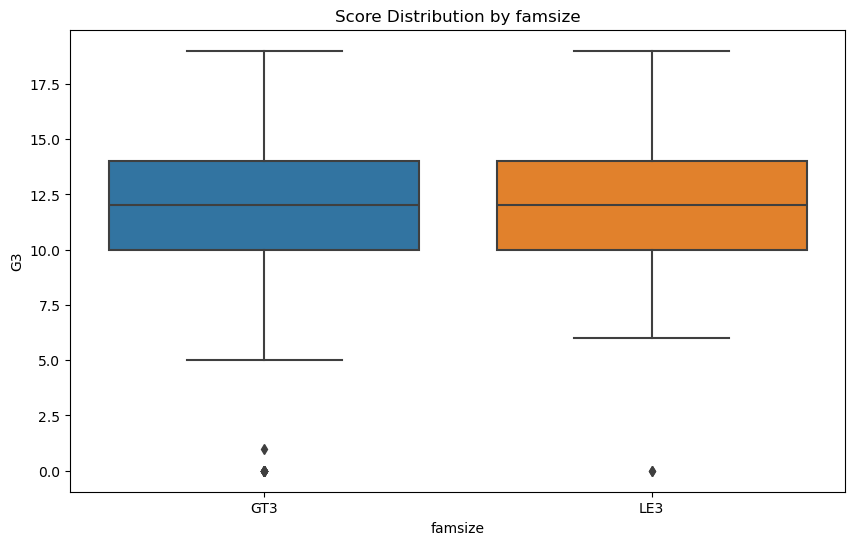

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='famsize', y='G3')
plt.title("Score Distribution by famsize")
plt.show()

**가족의 숫자는 성적에 영향이 없으므로 제거하는게 좋아보인다.**

#### **6. Pstatus**

In [30]:
student_df['Pstatus'].value_counts() # 부모님이랑 같이 살면 T 아니면 A

Pstatus
T    569
A     80
Name: count, dtype: int64

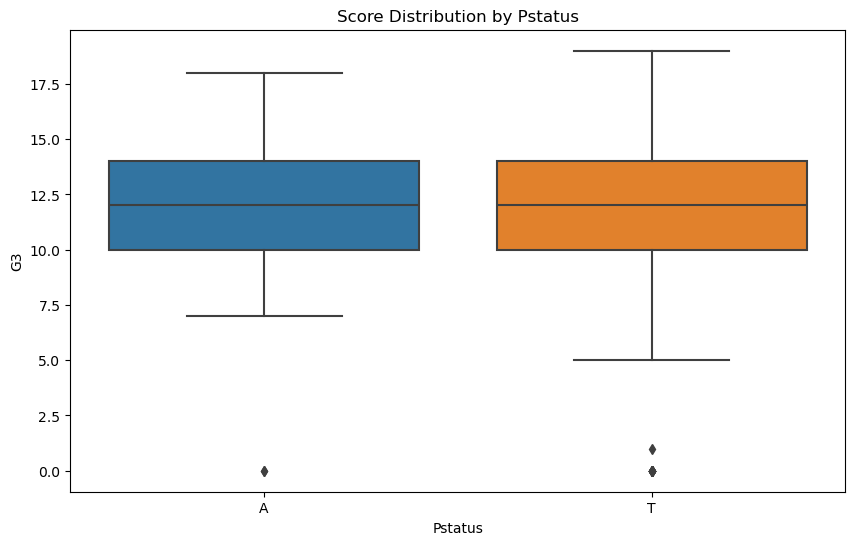

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Pstatus', y='G3')
plt.title("Score Distribution by Pstatus")
plt.show()

**부모님과 같이 사는지는 성적에 영향이 없다**

#### **7. Medu**

In [32]:
student_df['Medu'].value_counts()

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

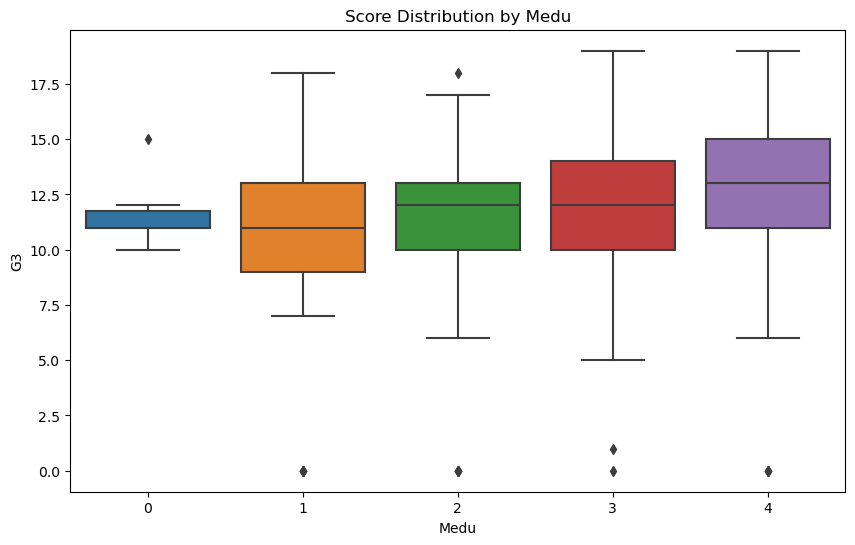

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Medu', y='G3')
plt.title("Score Distribution by Medu")
plt.show()

#### **8. Fedu**

In [34]:
student_df['Fedu'].value_counts()

Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

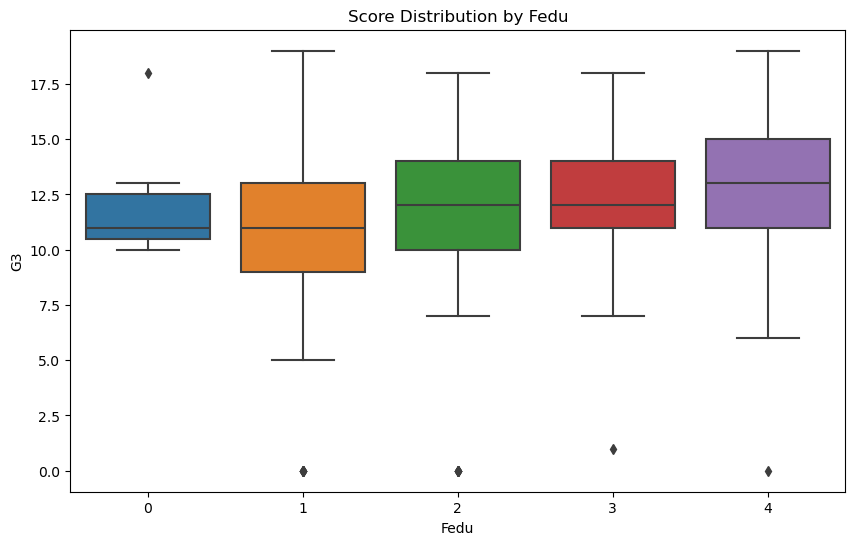

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Fedu', y='G3')
plt.title("Score Distribution by Fedu")
plt.show()

**부모의 교육수준이 올라갈 수록, 아이의 성적도 오르는 경향성이 있다.**

### **9. Mjob**

In [36]:
student_df['Mjob'].value_counts()

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

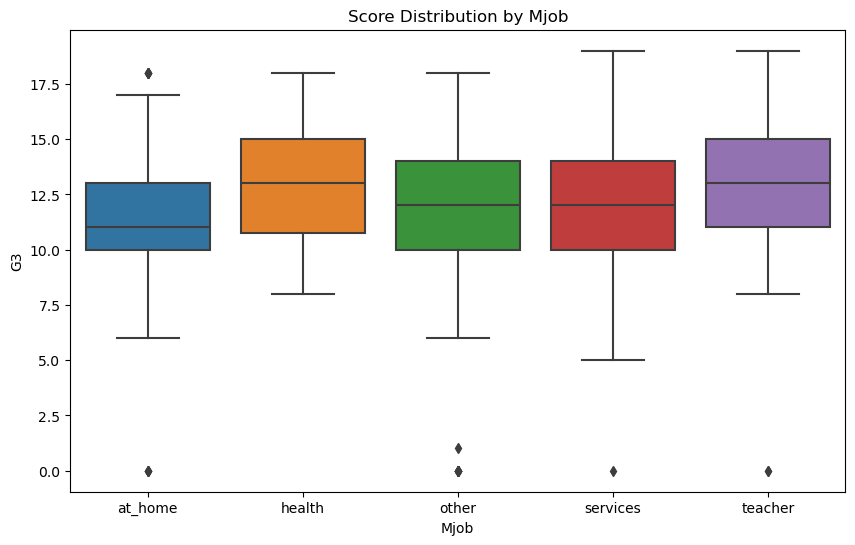

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Mjob', y='G3')
plt.title("Score Distribution by Mjob")
plt.show()

### **10. Fjob**

In [38]:
student_df['Fjob'].value_counts()

Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

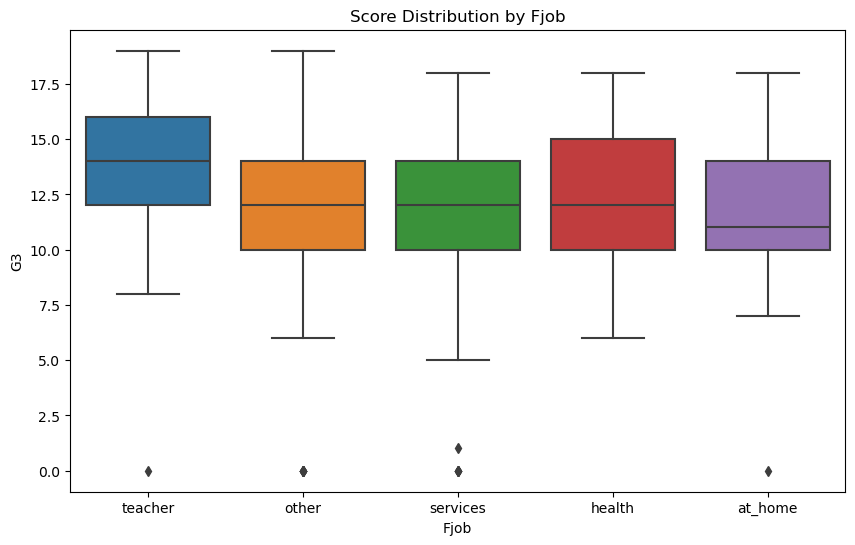

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Fjob', y='G3')
plt.title("Score Distribution by Fjob")
plt.show()

**부모님의 직장이 교사라면 성적이 높은 경향성이 있다. 따라서 부모중 교사의 존재 여부를 새로운 feature로 삼는게 좋아보임**

### **11. reason**

In [40]:
student_df['reason'].value_counts()

reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

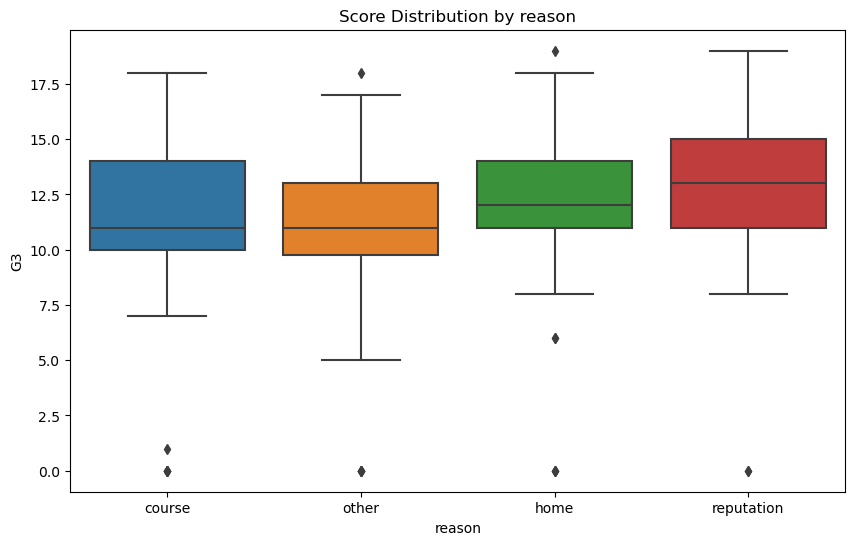

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='reason', y='G3')
plt.title("Score Distribution by reason")
plt.show()

### **12. guardian**

In [42]:
student_df['guardian'].value_counts()

guardian
mother    455
father    153
other      41
Name: count, dtype: int64

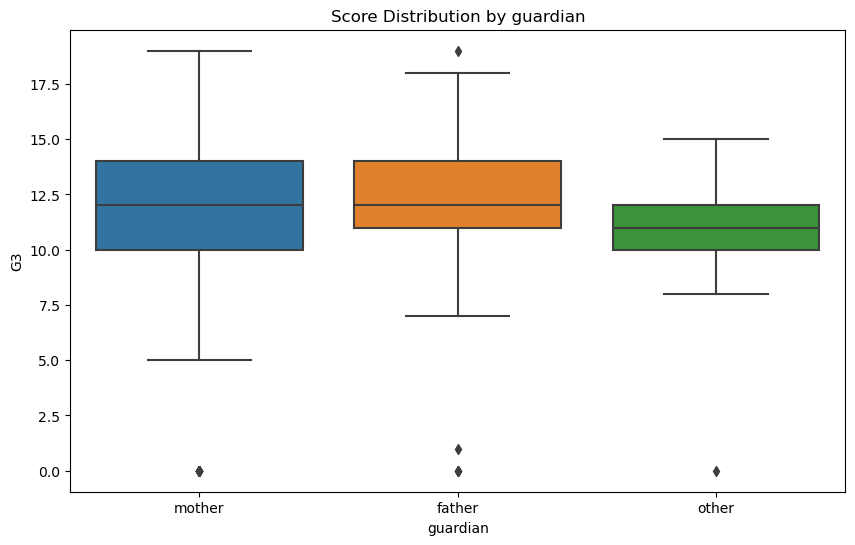

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='guardian', y='G3')
plt.title("Score Distribution by guardian")
plt.show()

**보호자가 엄마, 아빠가 아닌경우를 체크하는 feature를 생성하는 방향으로 접근하자**

### **13. traveltime**

In [44]:
student_df['traveltime'].value_counts()

traveltime
1    366
2    213
3     54
4     16
Name: count, dtype: int64

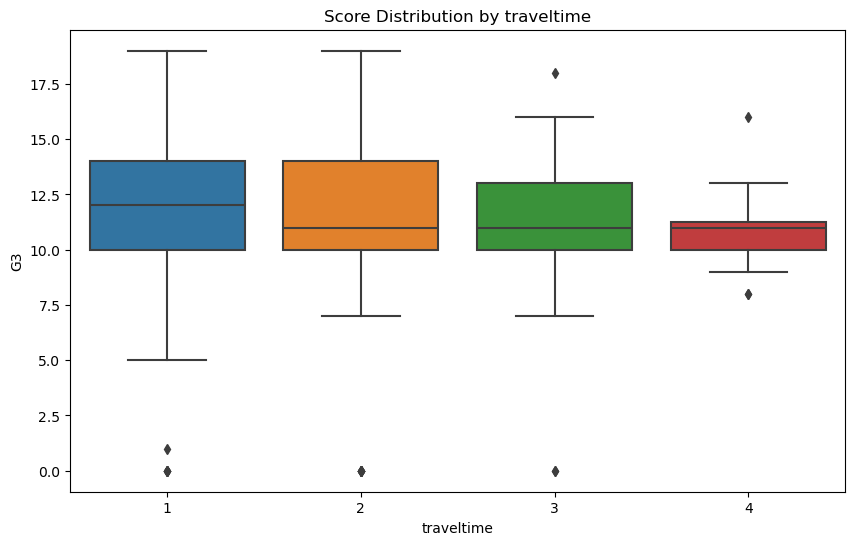

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='traveltime', y='G3')
plt.title("Score Distribution by traveltime")
plt.show()

**통학시간이 길어지면 성적도 떨어지는 경향성이 있다**

### **14. studytime**

In [46]:
student_df['studytime'].value_counts()

studytime
2    305
1    212
3     97
4     35
Name: count, dtype: int64

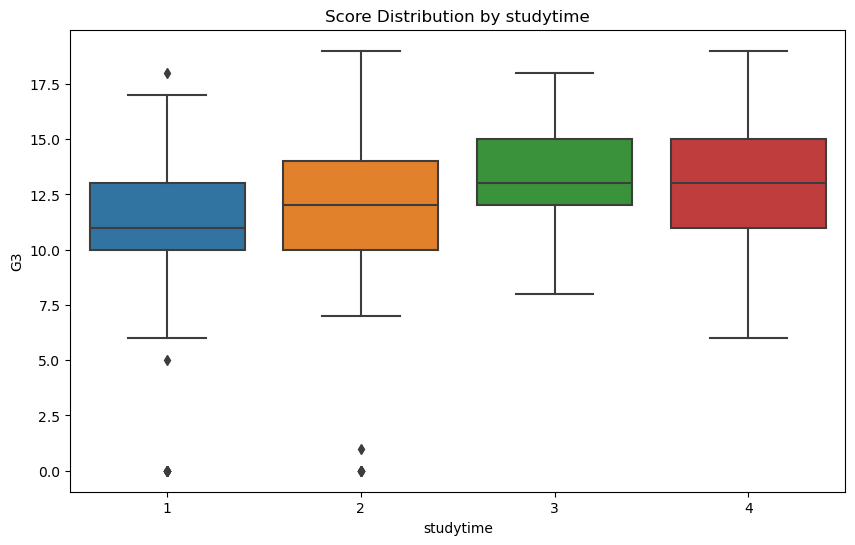

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='studytime', y='G3')
plt.title("Score Distribution by studytime")
plt.show()

**공부시간과 성적은 어느정도 비례한다**

### **15. failures**

In [48]:
student_df['failures'].value_counts()

failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64

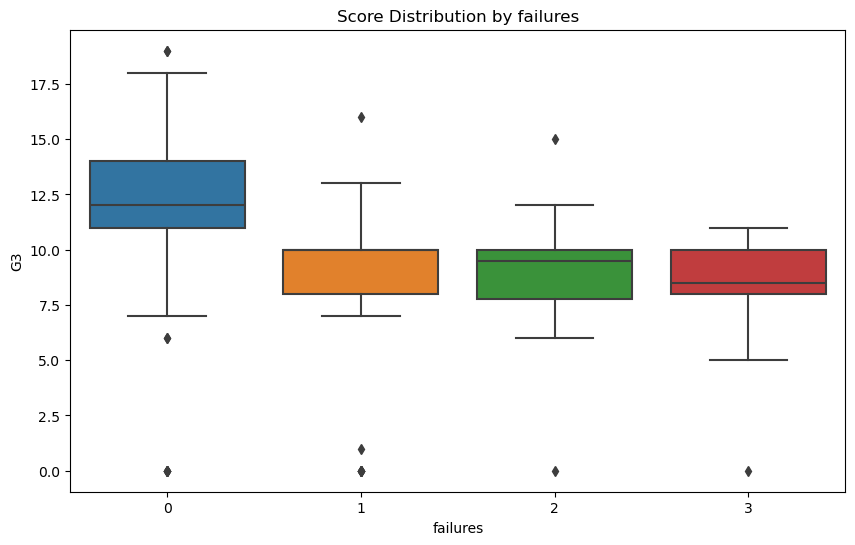

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='failures', y='G3')
plt.title("Score Distribution by failures")
plt.show()

**이전 수업에서 낙제한 경우가 있으면 성적이 크게 감소한다.**

### **16. schoolsup**

In [50]:
student_df['schoolsup'].value_counts()

schoolsup
no     581
yes     68
Name: count, dtype: int64

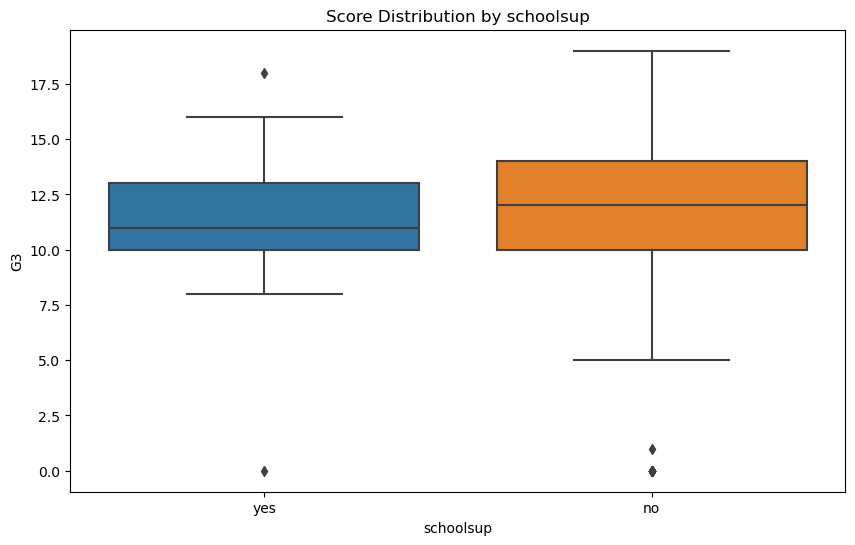

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='schoolsup', y='G3')
plt.title("Score Distribution by schoolsup")
plt.show()

### **17. famsup**

In [52]:
student_df['famsup'].value_counts()

famsup
yes    398
no     251
Name: count, dtype: int64

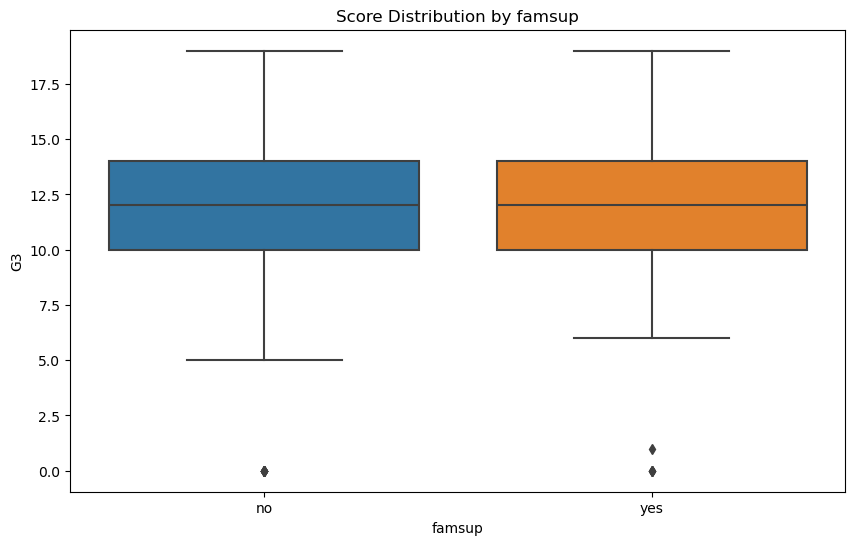

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='famsup', y='G3')
plt.title("Score Distribution by famsup")
plt.show()

**사교육은 성적에 그다지 영향을 주지 않는 것으로 보인다.**

### **18. paid**

In [54]:
student_df['paid'].value_counts()

paid
no     610
yes     39
Name: count, dtype: int64

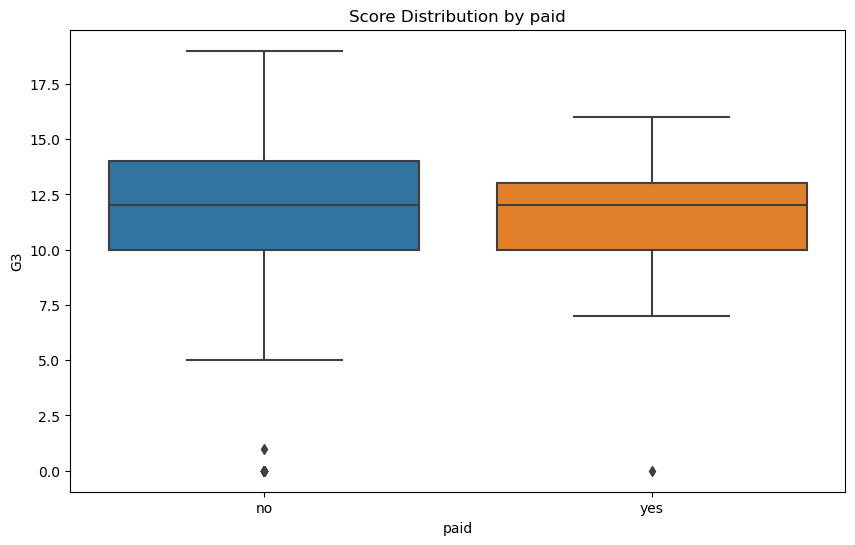

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='paid', y='G3')
plt.title("Score Distribution by paid")
plt.show()

### **19. activities**

In [56]:
student_df['activities'].value_counts()

activities
no     334
yes    315
Name: count, dtype: int64

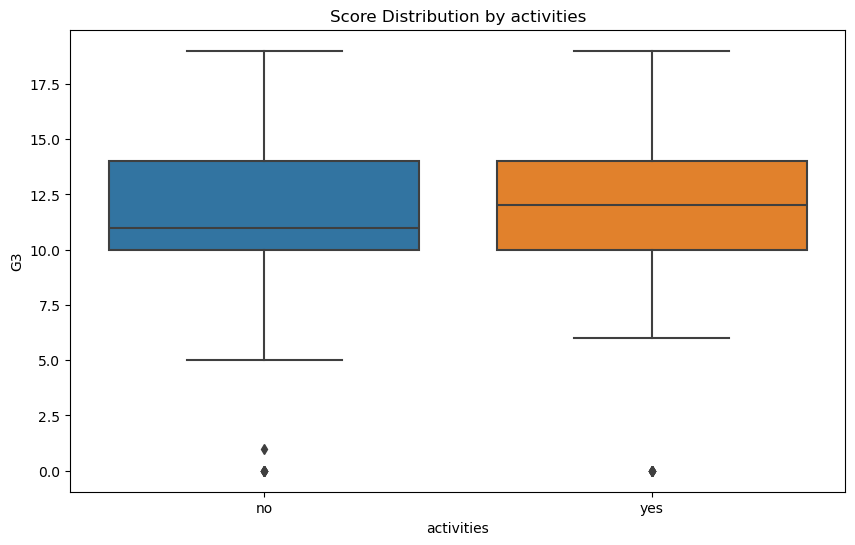

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='activities', y='G3')
plt.title("Score Distribution by activities")
plt.show()

**방과후 활동은 성적에 영향이 없음**

### **20. nursery**

In [58]:
student_df['nursery'].value_counts()

nursery
yes    521
no     128
Name: count, dtype: int64

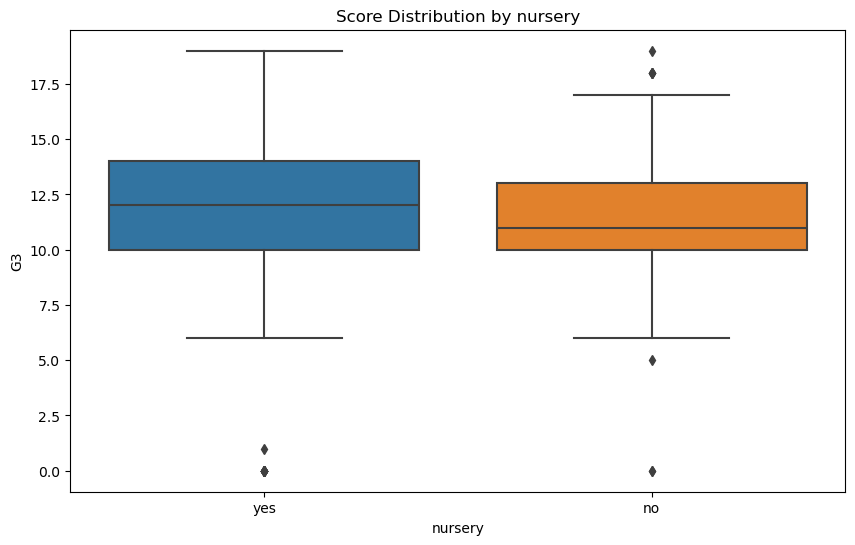

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='nursery', y='G3')
plt.title("Score Distribution by nursery")
plt.show()

**유치원에 다녔는지는 큰 영향이 없어보임**

### **21. higher**

In [60]:
student_df['higher'].value_counts()

higher
yes    580
no      69
Name: count, dtype: int64

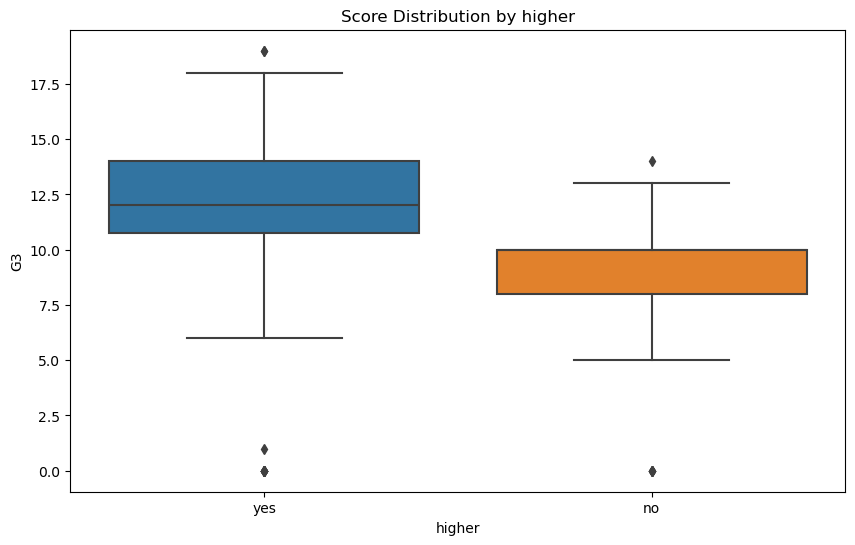

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='higher', y='G3')
plt.title("Score Distribution by higher")
plt.show()

**더 높은 수준의 교육을 원하는 학생이 성적이 확실히 높다**

### **22. internet**

In [62]:
student_df['internet'].value_counts()

internet
yes    498
no     151
Name: count, dtype: int64

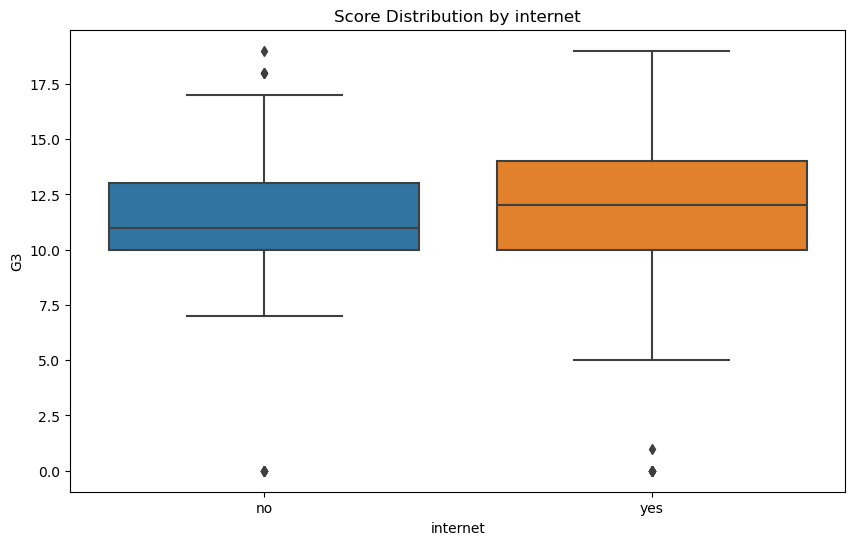

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='internet', y='G3')
plt.title("Score Distribution by internet")
plt.show()

**인터넷 여부는 성적에 큰 영향을 주지 않는다.**

### **23. romantic**

In [64]:
student_df['romantic'].value_counts()

romantic
no     410
yes    239
Name: count, dtype: int64

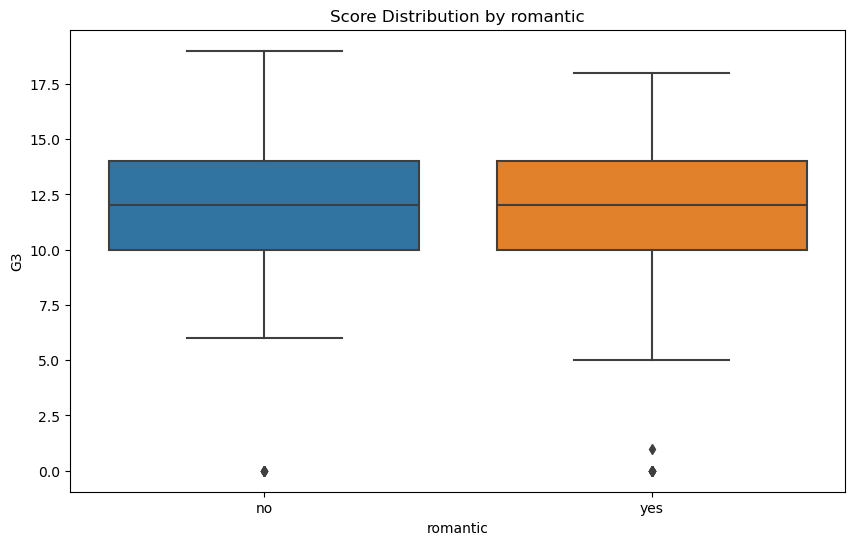

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='romantic', y='G3')
plt.title("Score Distribution by romantic")
plt.show()

**전혀 관계없는 변수**

### **24. famrel**

In [66]:
student_df['famrel'].value_counts()

famrel
4    317
5    180
3    101
2     29
1     22
Name: count, dtype: int64

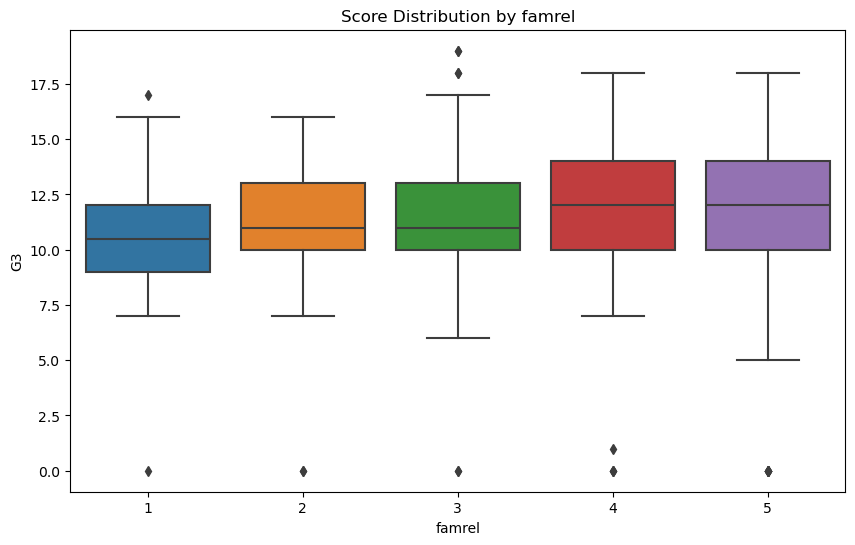

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='famrel', y='G3')
plt.title("Score Distribution by famrel")
plt.show()

**가족관계는 어느정도 보조변수로 사용할 수 있을 것으로 보인다**

### **25. freetime**

In [68]:
student_df['freetime'].value_counts()

freetime
3    251
4    178
2    107
5     68
1     45
Name: count, dtype: int64

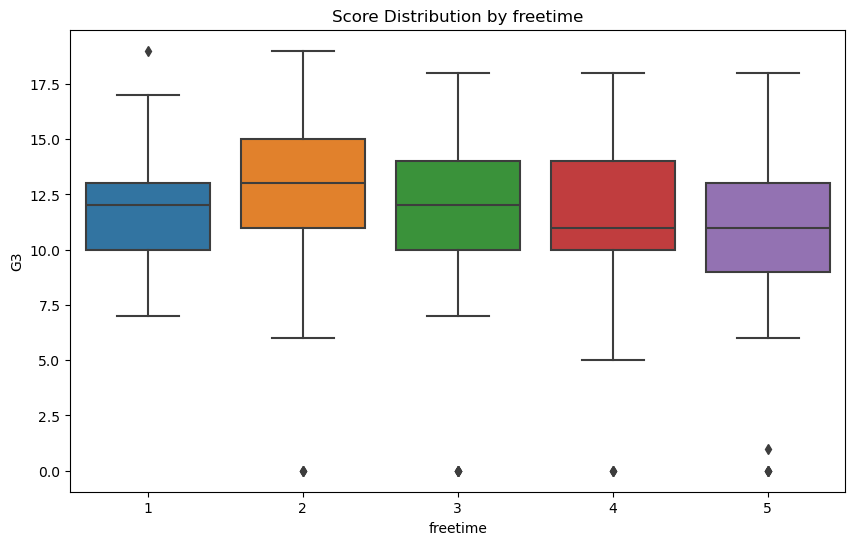

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='freetime', y='G3')
plt.title("Score Distribution by freetime")
plt.show()

**차이가 있기는 한데 일관적이지 않고 영향이 적을 것으로 생각됨**

### **26. goout**

In [70]:
student_df['goout'].value_counts()

goout
3    205
2    145
4    141
5    110
1     48
Name: count, dtype: int64

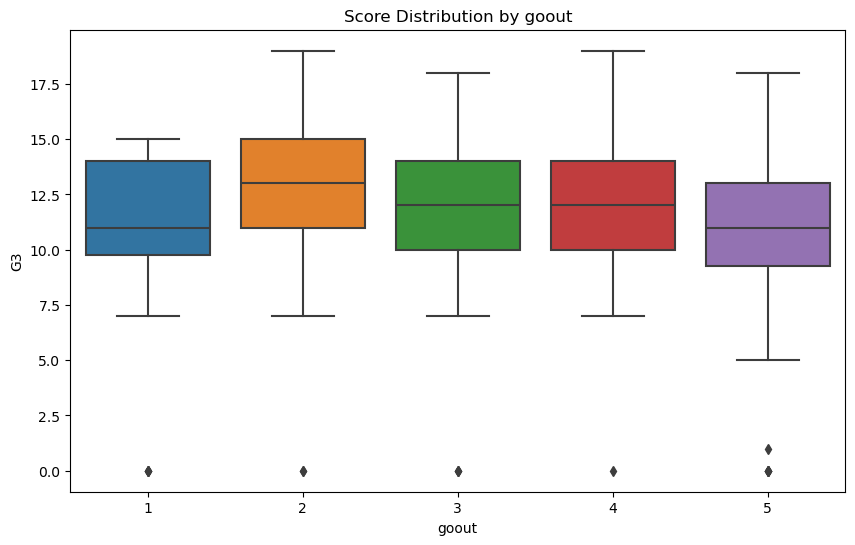

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='goout', y='G3')
plt.title("Score Distribution by goout")
plt.show()

**친구와 자주 노는지는 성적에 그다지 영향이 없어보인다**

### **27. Dalc**

In [72]:
student_df['Dalc'].value_counts()

Dalc
1    451
2    121
3     43
5     17
4     17
Name: count, dtype: int64

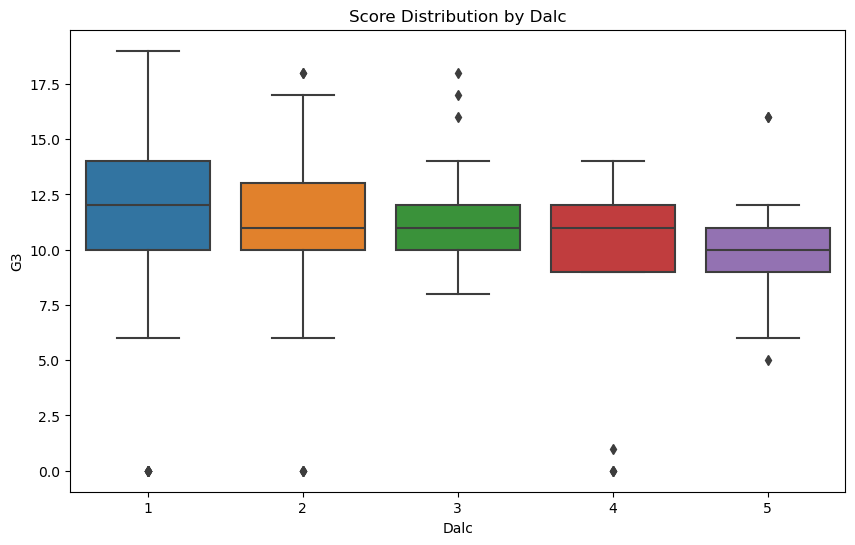

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Dalc', y='G3')
plt.title("Score Distribution by Dalc")
plt.show()

**음주 비율이 낮은 학생이 더 좋은 성적을 받는 경향이 있다.**

### **28. Walc**

In [74]:
student_df['Walc'].value_counts()

Walc
1    247
2    150
3    120
4     87
5     45
Name: count, dtype: int64

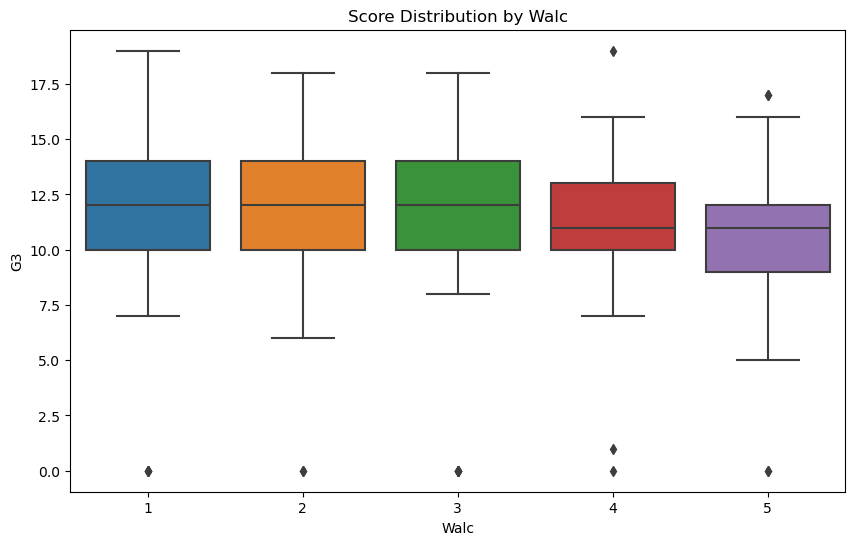

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='Walc', y='G3')
plt.title("Score Distribution by Walc")
plt.show()

**둘다 쓸 필요는 없고 Dalc를 쓰는 편이 더 좋아보인다**

### **30. absences**

In [76]:
student_df['absences'].value_counts()

absences
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
21      2
15      2
22      2
30      1
26      1
24      1
13      1
32      1
Name: count, dtype: int64

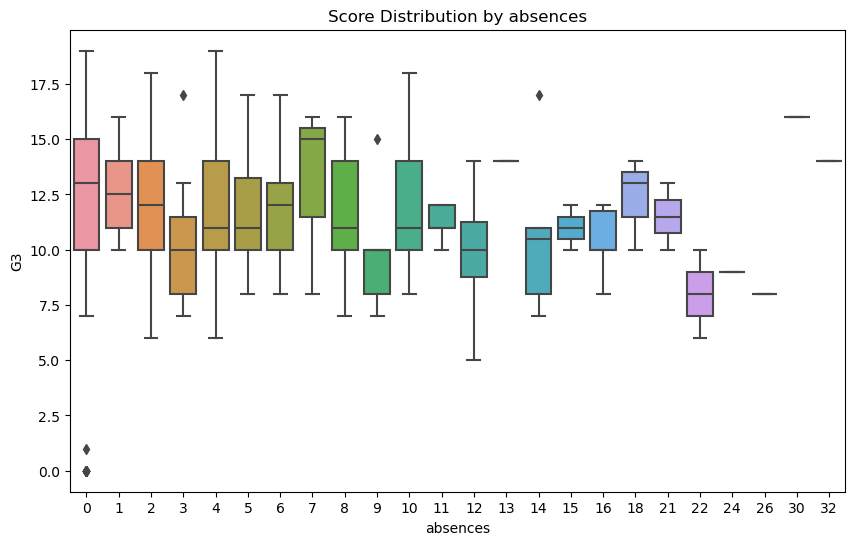

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x='absences', y='G3')
plt.title("Score Distribution by absences")
plt.show()

**결석횟수가 많을 수록 성적이 낮아지는 경향성이 있는 것 같다**

## **요약**

1 school - 사용  
2 sex - 일단 사용  
3 age - 19세 이상인지 여부로 바꿔서 사용  
4 address - 제거  
5 famsize - 제거  
6 Pstatus - 제거  
7 Medu - 사용  
8 Fedu - 사용  
9 Mjob -  
10 Fjob - 교사의 존재여부로 바꿔서 사용  
11 reason - 제거  
12 guardian - OTHER 인지아닌지  
13 traveltime - 사용  
14 studytime - 사용  
15 failures - 사용  
16 schoolsup - 제거  
17 famsup -제거  
18 paid - 제거  
19 activities - 제거   
20 nursery - 제거  
21 higher - 사용  
22 internet - 제거  
23 romantic - 제거  
24 famrel - 사용  
25 freetime - 제거  
26 goout -제거  
27 Dalc - 사용  
28 Walc -Dalc만 사용  
29 health - 제거  
30 absences - 사용  

### **Correlation Matrix**

In [78]:
student_df.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,-0.098971
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151,0.261387
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800,0.231348
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,-0.185289
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,0.239055
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,-0.355557
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361,0.074834
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705,-0.113957
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641,-0.106104
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719,-0.206641


<Axes: >

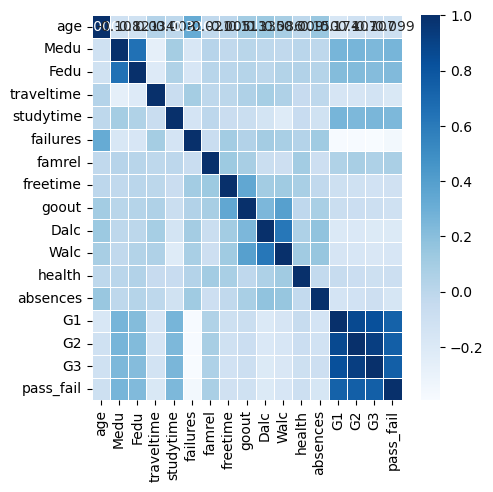

In [79]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=student_df.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')

## **Feature Engineering**

In [80]:
student_df['age_19_or_above'] = student_df['age'].apply(lambda x: 1 if x >= 19 else 0)
student_df = student_df.drop(columns=['age'])

In [81]:
student_df = student_df.drop(columns=['address', 'famsize', 'activities', 'nursery', 'internet',\
                                      'romantic', 'freetime', 'goout', 'Walc', 'health', 'G1', 'G2', 'G3'])

In [82]:
student_df['parent_teacher'] = student_df[['Mjob', 'Fjob']].apply(lambda x: 1 if 'teacher' in x.values else 0, axis=1)
student_df = student_df.drop(columns=['Mjob', 'Fjob'])

In [83]:
student_df = student_df.drop(columns=['reason'])

In [84]:
student_df['guardian_other'] = student_df['guardian'].apply(lambda x: 1 if x == 'other' else 0)
student_df = student_df.drop(columns=['guardian'])

In [85]:
student_df['school'] = student_df['school'].apply(lambda x: 0 if x == 'GP' else 1)

In [86]:
student_df['sex'] = student_df['sex'].apply(lambda x: 0 if x == 'F' else 1)
student_df['higher'] = student_df['higher'].apply(lambda x: 0 if x == 'yes' else 1)

In [87]:
student_df['Pstatus'] = student_df['Pstatus'].apply(lambda x: 0 if x == 'A' else 1)
student_df['schoolsup'] = student_df['schoolsup'].apply(lambda x: 0 if x == 'yes' else 1)
student_df['famsup'] = student_df['famsup'].apply(lambda x: 0 if x == 'no' else 1)
student_df['paid'] = student_df['paid'].apply(lambda x: 0 if x == 'no' else 1)

In [88]:
student_df

,school,sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,famrel,Dalc,absences,pass_fail,age_19_or_above,parent_teacher,guardian_other
0,0,0,0,4,4,2,2,0,0,0,0,0,4,1,4,0,0,1,0
1,0,0,1,1,1,1,2,0,1,1,0,0,5,1,2,0,0,0,0
2,0,0,1,1,1,1,2,0,0,0,0,0,4,2,6,1,0,0,0
3,0,0,1,4,2,1,3,0,1,1,0,0,3,1,0,1,0,0,0
4,0,0,1,3,3,1,2,0,1,1,0,0,4,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,1,2,3,1,3,1,1,0,0,0,5,1,4,0,1,0,0
645,1,0,1,3,1,1,2,0,1,1,0,0,4,1,4,1,0,1,0
646,1,0,1,1,1,2,2,0,1,0,0,0,1,1,6,0,0,0,0
647,1,1,1,3,1,2,1,0,1,0,0,0,2,3,6,0,0,0,0


### **학습-테스트데이터 분리, 데이터 스케일링**

In [89]:
# 타겟변수 pass_fail 분리
X = student_df.drop(columns=['pass_fail'])
y = student_df['pass_fail']

In [90]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
from sklearn.model_selection import train_test_split

# 7:1:2 비율로 학습, 검증, 테스트 데이터 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [92]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(454, 18) (454,) (65, 18) (65,) (130, 18) (130,)


## **로지스틱회귀 모델 구축과 학습**

sklearn.linear_model의 LogisticRegression은 모델의 통계적해석을 위한 지표를 제공하지 않는다.

따라서 Statsmodels 라이브러리를 사용

In [93]:
import statsmodels.api as sm

X_train_with_const = sm.add_constant(X_train)
y_train = y_train

# 로지스틱 회귀 모델 구축, 학습
logit_model = sm.Logit(y_train, X_train_with_const)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.481219
         Iterations 7


In [94]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 예측 확률 계산 (0 ~ 1 사이의 값)
y_val_pred_prob = logit_results.predict(sm.add_constant(X_val))

# 임계값 0.5를 기준으로 클래스 예측 (0 또는 1)
y_val_pred = np.where(y_val_pred_prob >= 0.5, 1, 0)

**모델의 통계 지표 확인**

In [95]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:              pass_fail   No. Observations:                  454
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                           18
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.3038
Time:                        22:03:48   Log-Likelihood:                -218.47
converged:                       True   LL-Null:                       -313.82
Covariance Type:            nonrobust   LLR p-value:                 7.179e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.138     -0.008      0.994      -0.271       0.269
x1            -0.5268      0.131     -4.027      0.000      -0.783      -0.270
x2            -0.1911      0.131     -1.458      0.1

In [96]:
con_mat = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", con_mat)

# 정밀도, 재현율, F1 점수 계산
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Precision:\n", precision)
print("Recall:\n", recall)
print("F1 Score:\n", f1)

Confusion Matrix:
 [[20 14]
 [ 7 24]]
Precision:
 0.631578947368421
Recall:
 0.7741935483870968
F1 Score:
 0.6956521739130435


### **Lasso, Ridge, Elasticnet**

In [97]:
from sklearn.linear_model import LogisticRegression

# Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42, C=0.05)
lasso_model.fit(X_train, y_train)
y_val_pred_prob_lasso = lasso_model.predict_proba(X_val)[:, 1]
y_val_pred_lasso = np.where(y_val_pred_prob_lasso >= 0.5, 1, 0)
precision_lasso = precision_score(y_val, y_val_pred_lasso)
recall_lasso = recall_score(y_val, y_val_pred_lasso)
f1_lasso = f1_score(y_val, y_val_pred_lasso)
confusion_lasso = confusion_matrix(y_val, y_val_pred_lasso)

print("Lasso Model:")
print("Precision:", precision_lasso)
print("Recall:", recall_lasso)
print("F1 Score:", f1_lasso)
print("Confusion Matrix:\n", confusion_lasso)
print()

# Ridge
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42, C=0.05)
ridge_model.fit(X_train, y_train)
y_val_pred_prob_ridge = ridge_model.predict_proba(X_val)[:, 1]
y_val_pred_ridge = np.where(y_val_pred_prob_ridge >= 0.5, 1, 0)
precision_ridge = precision_score(y_val, y_val_pred_ridge)
recall_ridge = recall_score(y_val, y_val_pred_ridge)
f1_ridge = f1_score(y_val, y_val_pred_ridge)
confusion_ridge = confusion_matrix(y_val, y_val_pred_ridge)

print("Ridge Model:")
print("Precision:", precision_ridge)
print("Recall:", recall_ridge)
print("F1 Score:", f1_ridge)
print("Confusion Matrix:\n", confusion_ridge)
print()

# ElasticNet
elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, random_state=42, C=0.05)
elasticnet_model.fit(X_train, y_train)
y_val_pred_prob_elasticnet = elasticnet_model.predict_proba(X_val)[:, 1]
y_val_pred_elasticnet = np.where(y_val_pred_prob_elasticnet >= 0.5, 1, 0)
precision_elasticnet = precision_score(y_val, y_val_pred_elasticnet)
recall_elasticnet = recall_score(y_val, y_val_pred_elasticnet)
f1_elasticnet = f1_score(y_val, y_val_pred_elasticnet)
confusion_elasticnet = confusion_matrix(y_val, y_val_pred_elasticnet)

print("ElasticNet:")
print("Precision:", precision_elasticnet)
print("Recall:", recall_elasticnet)
print("F1 Score:", f1_elasticnet)
print("Confusion Matrix:\n", confusion_elasticnet)

Lasso Model:
Precision: 0.5853658536585366
Recall: 0.7741935483870968
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[17 17]
 [ 7 24]]

Ridge Model:
Precision: 0.631578947368421
Recall: 0.7741935483870968
F1 Score: 0.6956521739130435
Confusion Matrix:
 [[20 14]
 [ 7 24]]

ElasticNet:
Precision: 0.6097560975609756
Recall: 0.8064516129032258
F1 Score: 0.6944444444444445
Confusion Matrix:
 [[18 16]
 [ 6 25]]
